<a href="https://colab.research.google.com/github/shreyansh273/Covid19-detection/blob/main/Covid_19_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Loading Packages**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import pandas as pd
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

**Defining variables**

In [ ]:
img_width, img_height = 200,200
train_data_dir = r"/content/gdrive/My Drive/DataScience/Covid19-dataset/train"
test_data_dir = r"/content/gdrive/My Drive/DataScience/Covid19-dataset/test"
epochs = 50
batch_size = 20

In [ ]:
if K.image_data_format() == "channels_first":
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

**Loading Images**

In [ ]:
covid_images = [os.path.join(train_data_dir, 'Covid', path) for path in os.listdir(train_data_dir + '/Covid')]
normal_images = [os.path.join(train_data_dir, 'Normal', path) for path in os.listdir(train_data_dir + '/Normal')]
viral_pneumonia_images = [os.path.join(train_data_dir, 'Viral Pneumonia', path) for path in os.listdir(train_data_dir + '/Viral Pneumonia')]

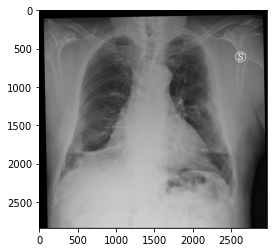

In [ ]:
img1 = Image.open(covid_images[1])
plt.imshow(np.array(image))

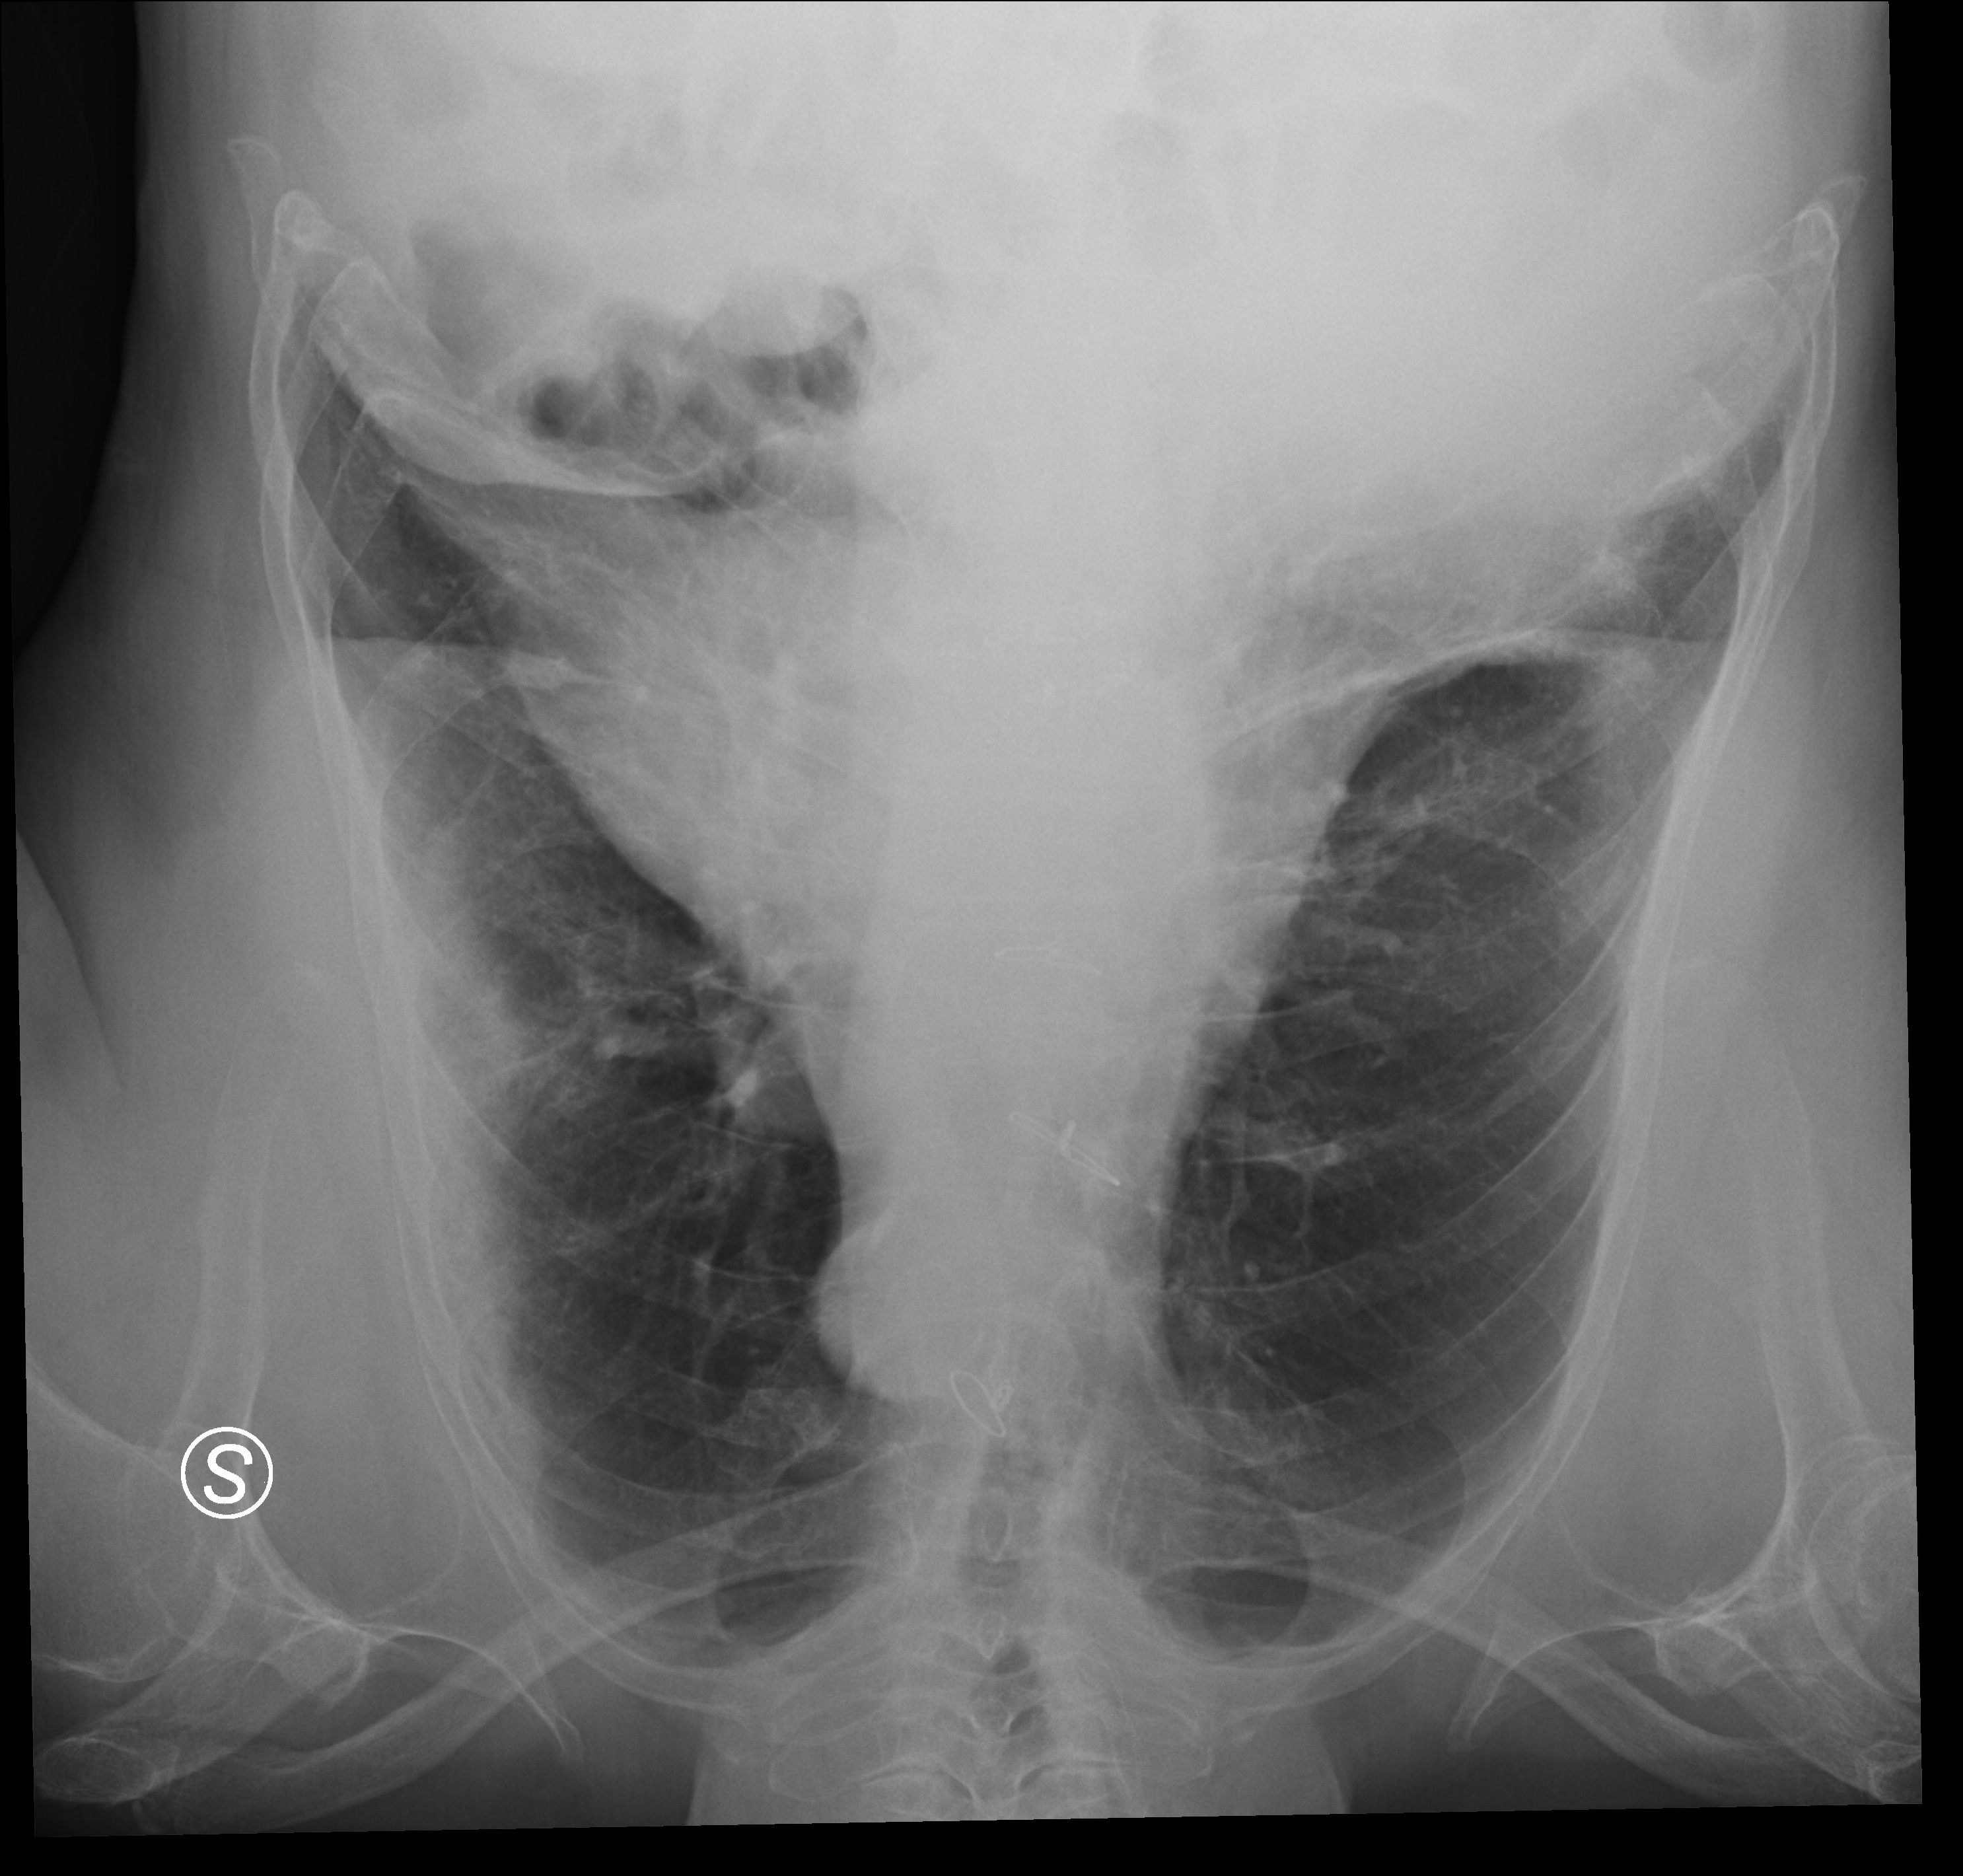

In [ ]:
img1.rotate(180)
#img1.convert(mode = 'L')
#img1.filter(ImageFilter.GaussianBlur())

In [ ]:
print(len(covid_images), len(normal_images), len(viral_pneumonia_images))

111 70 70


**Normalizing the data**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
#first generating images without augmentation for a baseline model
img_width, img_height = 224, 224
batch_size = 8

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
